In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [99]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [100]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [101]:
df.shape

(7043, 21)

In [102]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
int(df.duplicated().sum())

0

In [105]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [106]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Preprocesing and Cleaning

#### Replace the blank space in TotalCharges column with 0 and change the datatype to float

In [107]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Convert the value 0 and 1 in SeniorCitizen replace with Yes and No repesctively

In [109]:
def conv(value):
    return "Yes" if value == 1 else "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


### Data Visualization

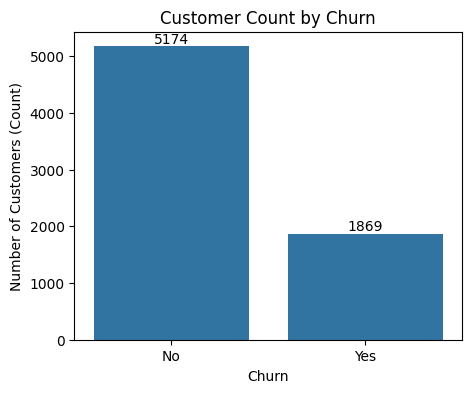

In [174]:
plt.figure(figsize=(5,4))
plt.title("Customer Count by Churn")
ax= sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.xlabel("Churn")
plt.ylabel("Number of Customers (Count)")
plt.show()

<small>This chart shows the number of customers who stayed vs those who churned.
Most customers did not churn.</small>

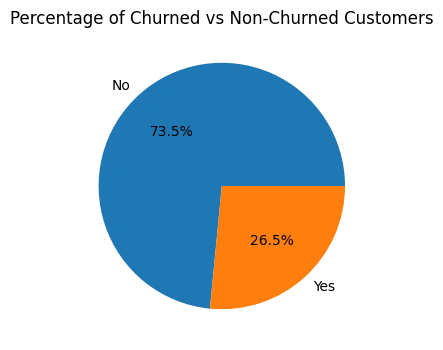

In [124]:
churn_count = df["Churn"].value_counts()
fig = plt.figure(figsize=(5, 4))
plt.pie(churn_count,labels=churn_count.index,autopct='%1.1f%%')
plt.title("Percentage of Churned vs Non-Churned Customers")
plt.show()

<small>This pie chart shows the percentage of customers who churned vs those who stayed.
A large majority of customers did not churn.</small>

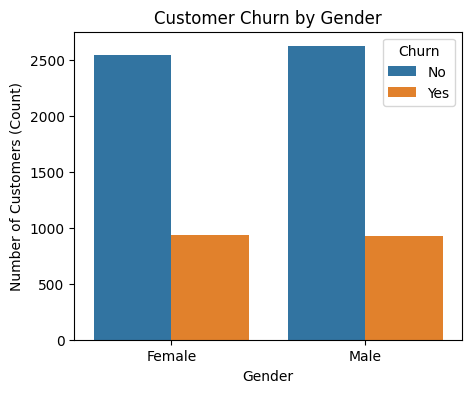

In [190]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Customer Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers (Count)")
plt.show()

<small>This chart compares churn between male and female customers. Churn rates are similar across both genders.</small>

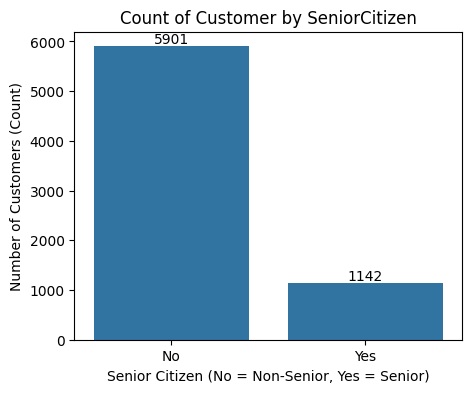

In [139]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.xlabel('Senior Citizen (No = Non-Senior, Yes = Senior)')
plt.ylabel("Number of Customers (Count)")
plt.show()

<small>This chart shows the number of senior and non-senior customers. Most customers are non-senior citizens.</small>

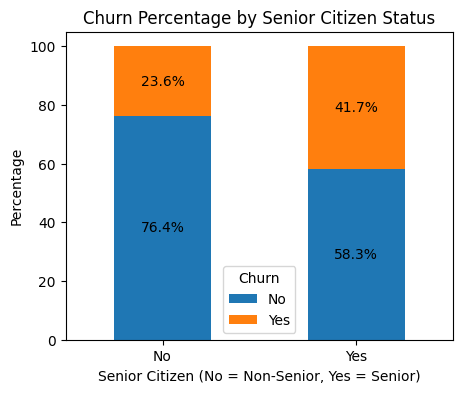

In [ ]:
# Pivot table: rows = SeniorCitizen, columns = Churn
churn_counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Normalize to get percentage
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plot and capture the axis
ax = churn_percentage.plot(kind='bar', stacked=True, figsize=(5, 4))

# Add percentage labels inside bars
for bar_index, row in enumerate(churn_percentage.values):
    cumulative = 0
    for i, value in enumerate(row):
        if value > 0:
            ax.text(
                bar_index, cumulative + value / 2,
                f'{value:.1f}%',
                ha='center', va='center',
                fontsize=10
            )
            cumulative += value

plt.title('Churn Percentage by Senior Citizen Status')
plt.xlabel('Senior Citizen (No = Non-Senior, Yes = Senior)')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()


<small>This chart shows the churn percentage for senior and non-senior customers. Senior citizens have a slightly higher churn rate than non-senior customers.</small>

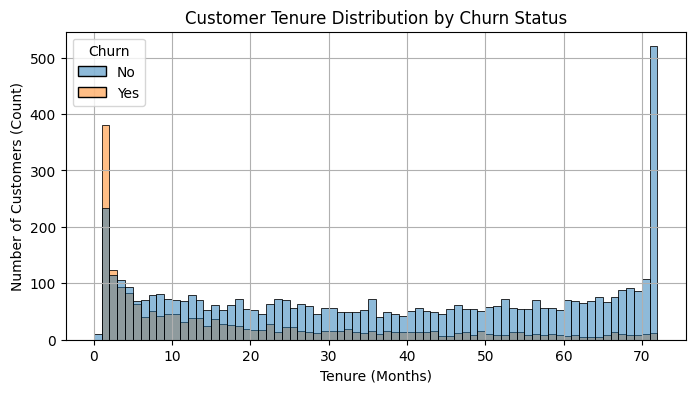

In [142]:
plt.figure(figsize=(8,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.title("Customer Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers (Count)")
plt.grid(True)
plt.show()

<small>This chart shows how long customers used the service and whether they left or stayed. Many customers churn wihin the first 1–2 months. Customers who stayed longer were less likely to churn.</small>

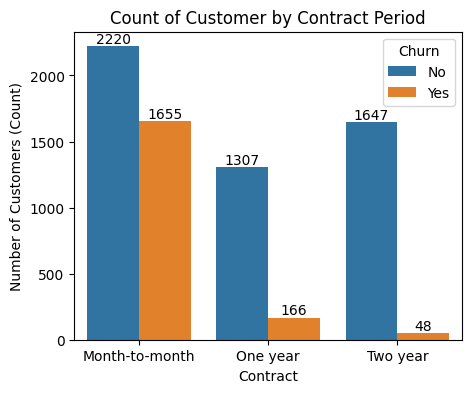

In [173]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x= "Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by Contract Period")
plt.ylabel("Number of Customers (Count)")
plt.show()

<small>This chart shows customer counts by contract type and churn status. Customers with month-to-month contracts churned the most,
while those with longer contracts were less likely to churn.<small>



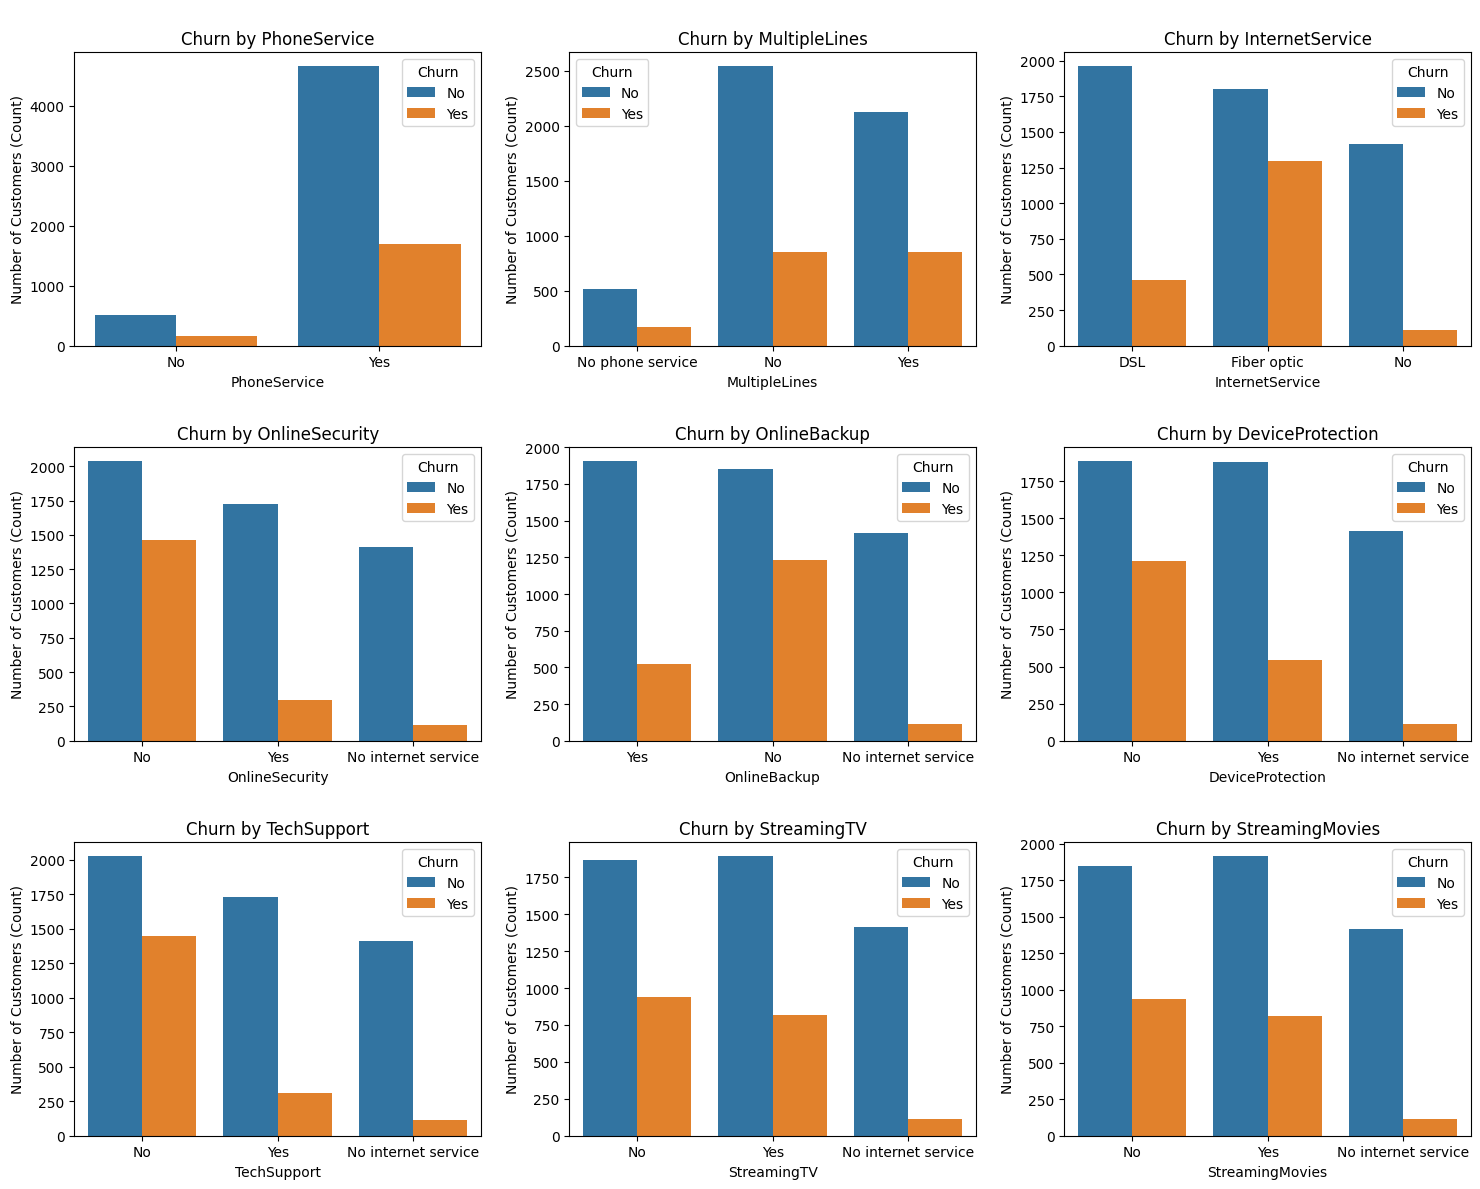

In [162]:
import math
# List of service columns to visualize
services = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

# Calculate rows and columns
n = len(services)
cols = 3
rows = math.ceil(n / cols)

# Setup subplots: adjust rows and columns based on how many services
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each service in a subplot
for i, service in enumerate(services):
    sns.countplot(x=service, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'\nChurn by {service}')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Number of Customers (Count)')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<small>These charts show how churn varies based on whether customers used different services. Customers not using services like Tech Support, Online Security, or Streaming tend to churn more. This suggests that customers who engage with more services are less likely to leave.<small>


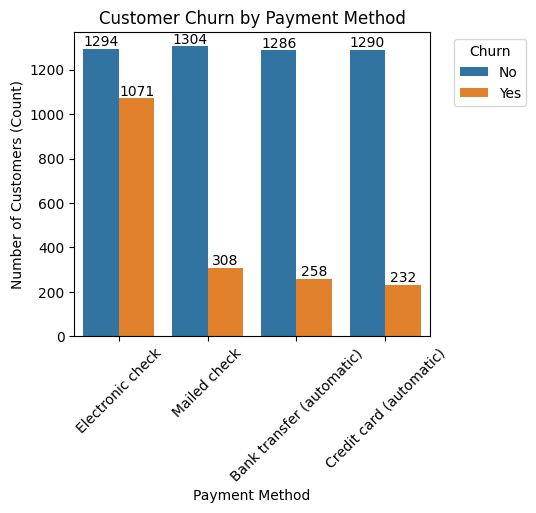

In [189]:
plt.figure(figsize=(5.5,4))
ax= sns.countplot(x='PaymentMethod', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers (Count)")
plt.legend(title="Churn", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<small>This chart shows how churn varies across different payment methods. Electronic check users have the highest churn, while customers using credit cards or bank transfers are less likely to churn.</small>

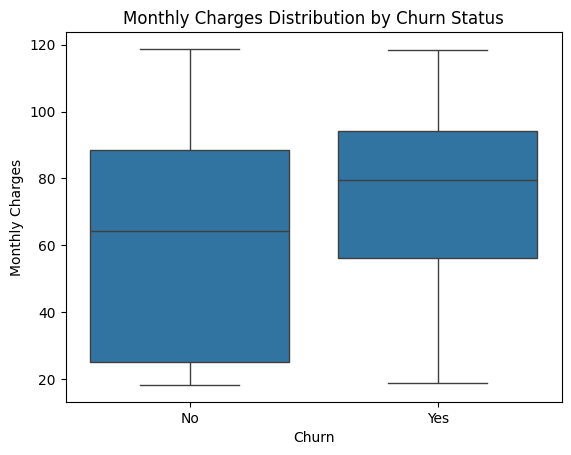

In [191]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


<small>Customers who churned tend to have higher monthly charges compared to those who stayed. This suggests that higher billing may be linked to customer dissatisfaction or churn.<small>
